In [22]:

#### ---- Keras on haberman dataset ---- ####

import warnings

warnings.simplefilter(action = "ignore", category = Warning)
warnings.filterwarnings("ignore")

from pandas import read_csv

df = read_csv(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv',
     header=None
)

print()
print("    " + str(df.shape))
print()



    (306, 4)



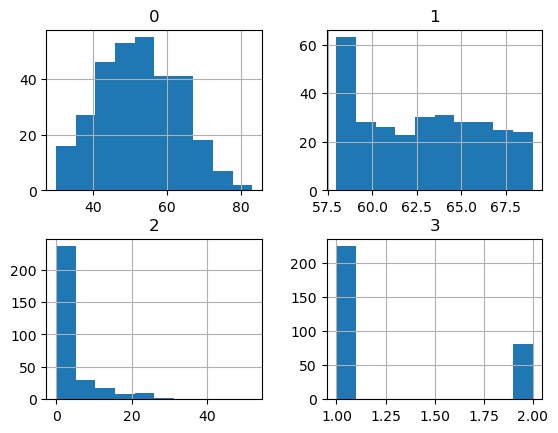

In [23]:

from matplotlib import pyplot

# plot histograms
df.hist()
pyplot.show()


In [24]:

from collections import Counter

columns = ['age', 'year', 'nodes', 'class']

df.columns = columns

target = df['class'].values
counter = Counter(target)

print()
print()
for k, v in counter.items():
    percent = v / len(target) * 100
    print('    Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, percent))
    print()
print()




    Class=1, Count=225, Percentage=73.529%

    Class=2, Count=81, Percentage=26.471%




In [25]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state = 42)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (n_features,)))
model.add(Dense(1, activation = 'sigmoid'))

# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

# fit the model
history = model.fit(X_train, y_train, epochs = 200, batch_size = 16, verbose = 0, validation_data = (X_test,y_test))

# predict test set
yhat = model.predict(X_test)
yhat_binary = (yhat > 0.5).astype(int)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 




    > Accuracy: 0.706



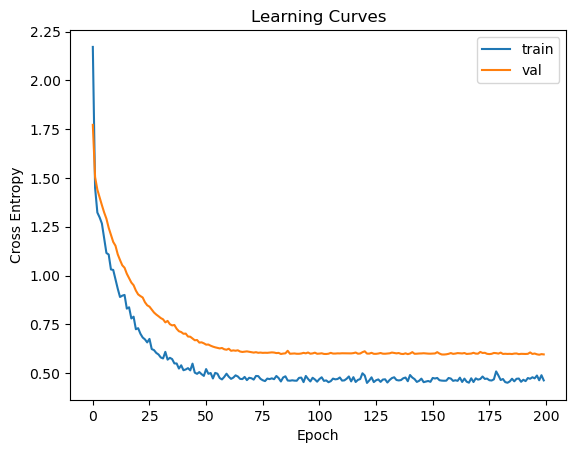

In [26]:

# evaluate predictions
score = accuracy_score(y_test, yhat_binary)

print()
print()
print('    > Accuracy: %.3f' % score)
print()

# plot learning curves

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()


In [30]:

#### ---- K-FOLD CROSS VALIDATION ---- ####

from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(5)
scores = list()

print()
print()
for train_ix, test_ix in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    n_features = X.shape[1]
    model = Sequential()
    model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (n_features,)))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    model.fit(X_train, y_train, epochs = 200, batch_size = 16, verbose = 0)
    yhat = model.predict(X_test)
    yhat_binary = (yhat > 0.5).astype(int)
    score = accuracy_score(y_test, yhat_binary)
    print('    > %.3f' % score)
    scores.append(score)
print()
print()
print('    > Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print()




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
    > 0.726
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
    > 0.738
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
    > 0.770
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
    > 0.738
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
    > 0.770


    > Mean Accuracy: 0.748 (0.019)

